# Loan Default Prediction

Final Project of Machine Learning I (DATS 6202 - 11, Spring 2018)  
**Authors:** Liwei Zhu,Wenye Ouyang,Xiaochi Li (Group 5)   
Data Science @ The George Washington University  


Data Source: https://www.kaggle.com/wendykan/lending-club-loan-data/data


**Abstract:** Loan default is always the threat to any financial institution and should be predicted in advance based on various features of the applicant. This study aims at applying machine models, including decision tree, logistic regression and random forest to classify applicants with and without loan default from a group of predicting variables, and evaluate their performance. Comparison between using unbalanced training set and balanced training set suggests that balancing the data is the key to improve model performance. The study also found that regression is the best model to classify those applicants with loan default, and the recall score can be 70% with balanced data.

### Environment specification
+ This notebook should be run under python with all necessary Data Science packages, Anaconda environment is recommended.
+ Training the model will occupy a lot of memory (about 3 GB or 2915MB), please turn off other programs if necessary.
+ Please use `conda install -c glemaitre imbalanced-learn` in conda prompt to install SMOTE package, or follow instructions on http://contrib.scikit-learn.org/imbalanced-learn/stable/install.html

## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

### Read data from file

In [2]:
df_loan = pd.read_csv("D:\loan.csv",low_memory=False) #read in the data

In [3]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

### Remove columns/rows that has too many NA
+ Remove columns whose NA is more than 70%
+ Remove rows whose NA is more than 30

In [5]:
null_rate = df_loan.isnull().sum(axis = 0).sort_values(ascending = False)/float((len(df_loan)))
null_rate[null_rate > 0.7]

dti_joint                      0.999426
verification_status_joint      0.999424
annual_inc_joint               0.999424
il_util                        0.979020
mths_since_rcnt_il             0.976549
all_util                       0.975916
max_bal_bc                     0.975916
open_rv_24m                    0.975916
open_rv_12m                    0.975916
total_cu_tl                    0.975916
total_bal_il                   0.975916
open_il_24m                    0.975916
open_il_12m                    0.975916
open_il_6m                     0.975916
open_acc_6m                    0.975916
inq_fi                         0.975916
inq_last_12m                   0.975916
desc                           0.857977
mths_since_last_record         0.845553
mths_since_last_major_derog    0.750160
dtype: float64

In [6]:
df_loan.drop(null_rate[null_rate>0.7].index,axis = 1,inplace=True)

In [7]:
df_loan.dropna(axis = 0,thresh=30,inplace = True)

### Find out the columns that has too few/ too much unique data
Inspect these columns to decide whether to remove them or not

In [8]:
unique_rate = df_loan.apply(lambda x: len(pd.unique(x)),axis = 0).sort_values(ascending = False) #unique rate and sort

In [9]:
unique_rate

id                            887379
url                           887379
member_id                     887379
total_pymnt                   506726
total_pymnt_inv               506616
tot_cur_bal                   327343
total_rec_int                 324635
emp_title                     299272
out_prncp_inv                 266244
total_rec_prncp               260227
out_prncp                     248332
last_pymnt_amnt               232451
revol_bal                      73740
installment                    68711
title                          63145
annual_inc                     49385
recoveries                     23055
total_rev_hi_lim               21252
collection_recovery_fee        20708
tot_coll_amt                   10326
funded_amnt_inv                 9856
total_rec_late_fee              6181
dti                             4086
funded_amnt                     1372
loan_amnt                       1372
revol_util                      1357
zip_code                         935
e

In [10]:
def column_analyse(x,df = df_loan): #print count for columns that only has few uniques
    print(df[x].value_counts(),"\n",df[x].value_counts()/len(df[x]))

column_analyse("pymnt_plan")
column_analyse("initial_list_status")
column_analyse("application_type")
column_analyse("acc_now_delinq")

n    887369
y        10
Name: pymnt_plan, dtype: int64 
 n    0.999989
y    0.000011
Name: pymnt_plan, dtype: float64
f    456848
w    430531
Name: initial_list_status, dtype: int64 
 f    0.514829
w    0.485171
Name: initial_list_status, dtype: float64
INDIVIDUAL    886868
JOINT            511
Name: application_type, dtype: int64 
 INDIVIDUAL    0.999424
JOINT         0.000576
Name: application_type, dtype: float64
0.0     883236
1.0       3866
2.0        208
3.0         28
4.0          7
5.0          3
6.0          1
14.0         1
Name: acc_now_delinq, dtype: int64 
 0.0     0.995331
1.0     0.004357
2.0     0.000234
3.0     0.000032
4.0     0.000008
5.0     0.000003
6.0     0.000001
14.0    0.000001
Name: acc_now_delinq, dtype: float64


### Inspect result:
According to the unique table:

+ We need to remove id,url,member_id because these three are 100% unique   
+ policy_code only has one value   
+ And payment_plan,application_type,acc_now_delinq are highly unbalanced (more than 90% are single value)  
+ emp_title,zip_code,title are too detail for analyze

In [11]:
delete_cols = ["policy_code", "pymnt_plan", "url", "id", "member_id", "application_type", "acc_now_delinq", "emp_title",
               "zip_code", "title"]
df_loan.drop(delete_cols, axis=1, inplace=True)

### Transfer the format of some columns
Transfer the value to number for further analyze

In [12]:
df_loan["term"] = df_loan["term"].str.split(" ").str[1] # transform term to integer

In [13]:
df_loan["emp_length"] = df_loan["emp_length"].str.extract("(\d+)").astype(float)
df_loan["emp_length"] = df_loan["emp_length"].fillna(df_loan.emp_length.median())

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


In [14]:
# transform datetimes to a period
col_dates = df_loan.dtypes[df_loan.dtypes == "datetime64[ns]"].index
for d in col_dates:
    df_loan[d] = df_loan[d].dt.to_period["M"]

### Transform some colums that are highly biased
More that half of the rows in these columns are in one value,so we tranform them into categorical variable.

+ delinq_2yrs: 80% are 0
+ inq_last_6mths:56% are 0
+ pub_rec:84% are 0

In [15]:
column_analyse("delinq_2yrs")
column_analyse("inq_last_6mths")
column_analyse("pub_rec")

0.0     716961
1.0     113224
2.0      33551
3.0      11977
4.0       5327
5.0       2711
6.0       1471
7.0        784
8.0        461
9.0        284
10.0       192
11.0       121
12.0        89
13.0        64
14.0        45
15.0        28
16.0        17
18.0        11
17.0        10
19.0         8
22.0         3
21.0         2
26.0         2
20.0         2
30.0         1
39.0         1
27.0         1
29.0         1
24.0         1
Name: delinq_2yrs, dtype: int64 
 0.0     0.807954
1.0     0.127594
2.0     0.037809
3.0     0.013497
4.0     0.006003
5.0     0.003055
6.0     0.001658
7.0     0.000884
8.0     0.000520
9.0     0.000320
10.0    0.000216
11.0    0.000136
12.0    0.000100
13.0    0.000072
14.0    0.000051
15.0    0.000032
16.0    0.000019
18.0    0.000012
17.0    0.000011
19.0    0.000009
22.0    0.000003
21.0    0.000002
26.0    0.000002
20.0    0.000002
30.0    0.000001
39.0    0.000001
27.0    0.000001
29.0    0.000001
24.0    0.000001
Name: delinq_2yrs, dtype: float64
0.0 

In [16]:
# 80% are 0
df_loan["delinq_2yrs_cat"] = 0
df_loan.loc[df_loan["delinq_2yrs"] > 0, "delinq_2yrs_cat"] = 1

In [17]:
# 56% are 0
df_loan["inq_last_6mths_cat"] = 0
df_loan.loc[df_loan["inq_last_6mths"]>0 ,"inq_last_6mths_cat"] = 1

In [18]:
# 84% are 0
df_loan["pub_rec_cat"] = 0
df_loan.loc[df_loan["pub_rec"]>0,"pub_rec_cat"] = 1 

### Make some new columns based on calcution of old variables
Funded_amnt	is the total amount committed to that loan at that point in time.  
Funded_amnt_inv	is total amount committed by investors for that loan at that point in time.  
When they are not same(the investor pays fewer than expected), mark it as less.  
Open_acc is the number of open credit lines in the borrower's credit file.  
total_acc is the total number of credit lines currently in the borrower's credit file  
The ratio means how many loans does the applicant have now.

In [19]:
df_loan['acc_ratio'] = df_loan.open_acc / df_loan.total_acc

In [20]:
df_loan['amt_difference'] = 'eq'
df_loan.loc[(df_loan['funded_amnt'] - df_loan['funded_amnt_inv']) > 0,'amt_difference'] = 'less'

These are the features we select:  
Reference Data Dictionary :**LCDataDictionary.xlsx**

|Feature|Defination|
|----|----|
|loan_amnt|The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.|
|amt_difference|Whether investor pays fewer than requested by the borrower|
|term|The number of payments on the loan. Values are in months and can be either 36 or 60.|
|installment|Number of currently active installment trades|
|grade|LC assigned loan grade|
|emp_length|Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 |
|home_ownership|The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.|
|annual_inc|The self-reported annual income provided by the borrower during registration.|
|verification_status|Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified|
|purpose|A category provided by the borrower for the loan request. |
|dti|A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.|
|delinq_2yrs_cat|The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years|
|inq_last_6mths_cat|The number of inquiries in past 6 months (excluding auto and mortgage inquiries)|
|open_acc|The number of open credit lines in the borrower's credit file.|
|pub_rec|Number of derogatory public records|
|pub_rec_cat|Categorical transformation of pub_rec|
|acc_ratio|How many loans accounts(ratio to total account) does the applicant have now| 
|initial_list_status|The initial listing status of the loan.|
|loan_status|Current status of the loan|

In [21]:
features = ['loan_amnt', 'amt_difference', 'term', 
            'installment', 'grade','emp_length',
            'home_ownership', 'annual_inc','verification_status',
            'purpose', 'dti', 'delinq_2yrs_cat', 'inq_last_6mths_cat', 
            'open_acc', 'pub_rec', 'pub_rec_cat', 'acc_ratio', 'initial_list_status',  
            'loan_status'
           ]

### Transform loan_status
+ Current, which means the loan status may still change in the future, is't useful to us
+ Make "Charged Off" to 0, all the others to 1
+ If there are still NA in the row, drop the row

In [22]:
df_loan.groupby("loan_status").size().sort_values(ascending=False)/len(df_loan)*100

loan_status
Current                                                67.815330
Fully Paid                                             23.408600
Charged Off                                             5.099061
Late (31-120 days)                                      1.306206
Issued                                                  0.953369
In Grace Period                                         0.704659
Late (16-30 days)                                       0.265614
Does not meet the credit policy. Status:Fully Paid      0.224031
Default                                                 0.137371
Does not meet the credit policy. Status:Charged Off     0.085758
dtype: float64

In [23]:
X_clean = df_loan.loc[df_loan.loan_status != "Current",features] #remove the record where status is current 

In [24]:
mask = (X_clean.loan_status == 'Charged Off')
X_clean['target'] = 0
X_clean.loc[mask,'target'] = 1

### One-Hot encoding on categorical features

In [25]:
cat_features = ['term','amt_difference', 'grade', 'home_ownership', 'verification_status', 'purpose', 'delinq_2yrs_cat', 
                'inq_last_6mths_cat', 'pub_rec_cat', 'initial_list_status',]
X_clean.dropna(axis=0, how = 'any', inplace = True) #drop all records that contains NA

In [26]:
X = pd.get_dummies(X_clean[X_clean.columns[:-2]], columns=cat_features).astype(float)

### Final Steps of preprocessing
+ Define target as y
+ Train test split
+ Standardize X_train with fit_transform, X_test with tranform only.

In [27]:
y = X_clean['target']

In [28]:
from sklearn.model_selection import train_test_split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y.values, test_size=0.3, random_state=0)

In [29]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train = stdsc.fit_transform(X_train_raw)
X_test = stdsc.transform(X_test_raw)

## End of preprocess 
By the end of this step, we have X_train,X_test,y_train,y_test for further steps.

## Begin model train/test/evaluate

### Import the classifiers from Scikt-learn

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

### Define the model sets 
We will compare the models based on the model sets

In [31]:
different_model_comparison = {
    "Random Forest":RandomForestClassifier(random_state=0,n_estimators=10),
    "Logistic Regression":LogisticRegression(random_state=0),
    "Decision Tree":DecisionTreeClassifier(random_state=0)#,
    #"SVM":SVC(random_state=0,probability=True) #too slow
}

# We tried to use 1~60 ,but it will be slow and the improvemnet is not significant.
different_tree_number_comaprison = {
    "Random Forest(1)":RandomForestClassifier(random_state=0,n_estimators=1),
    "Random Forest(5)":RandomForestClassifier(random_state=0,n_estimators=5),
    "Random Forest(10)":RandomForestClassifier(random_state=0,n_estimators=10),
    "Random Forest(15)":RandomForestClassifier(random_state=0,n_estimators=15),
    "Random Forest(20)":RandomForestClassifier(random_state=0,n_estimators=20),
    "Random Forest(25)":RandomForestClassifier(random_state=0,n_estimators=25),
    "Random Forest(30)":RandomForestClassifier(random_state=0,n_estimators=30)
}

### Define the general purpose functions
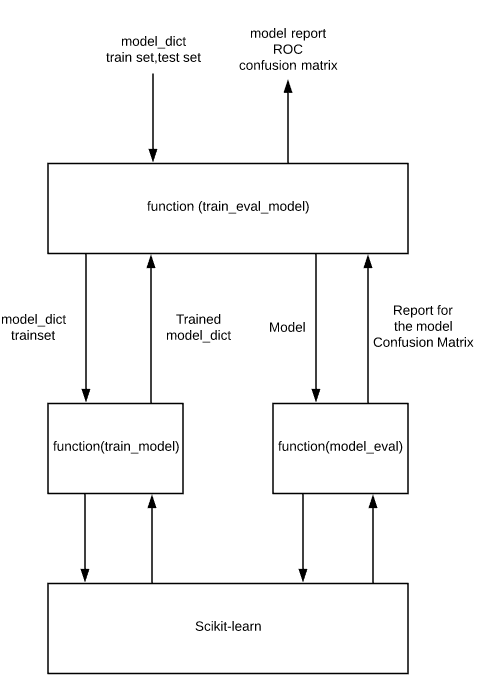

#### Function to train model, return a dictionary of trained model

In [32]:
# Wrapping this function so we can easily change from original data to balanced data
# function to train model, return a dictionary of trained model
def train_model(model_dict,X_train,y_train):
    for model in model_dict:
        print("Training:",model)
        model_dict[model].fit(X_train,y_train)
    return model_dict

#### Function to evaluate model performance  
We use the following metrics: Precision, Recall,F1 score,AUC

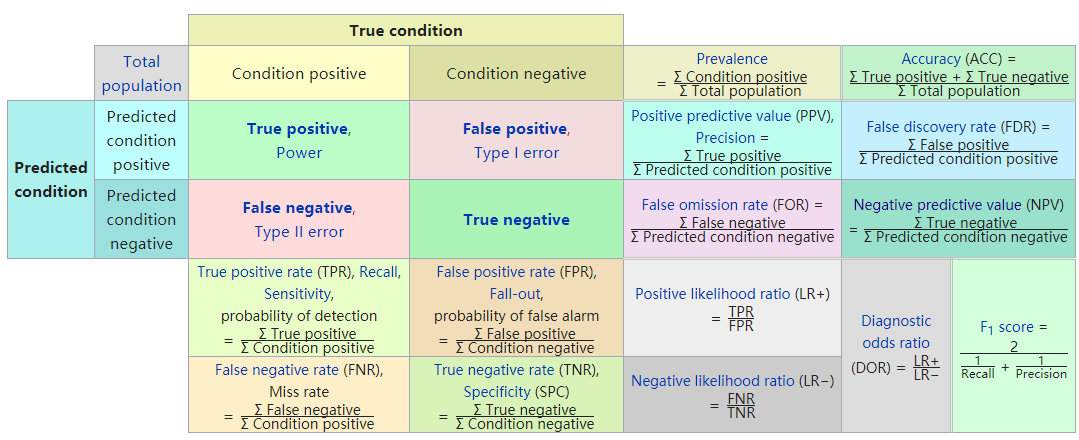

|Metric|Definition|Meaning|
|----|----|----|
|Precision|TP/(TP+FP)|The ability of the classifier not to label  a sample that is negative as positive|
|Recall|TP/(TP+FN)|The ability of the classifier to find all the positive samples|
|F1 Score|F1 = 2 \* (precision \* recall) / (precision + recall)|Weighted average of the precision and recall|
|roc_auc_score|area under the curve(AUC) |Determine which of the used models predicts the classes best|



In [33]:
# Wrapping this function so we can easily change the model and evaluate them
# function to evaluate model performance 
from sklearn import metrics
def model_eval(clf_name,clf,X_test,y_test):
    print("Evaluating:",clf_name)
    y_pred = clf.predict(X_test)
    y_score = clf.predict_proba(X_test)[:,1]
    confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['True'], colnames= ['Predicted'], margins=False)
    report = pd.Series({
        "model":clf_name,
        "precision":metrics.precision_score(y_test, y_pred),
        "recall":metrics.recall_score(y_test, y_pred),
        "f1":metrics.f1_score(y_test, y_pred),
        'roc_auc_score' : metrics.roc_auc_score(y_test, y_score)
    })
    # draw ROC 
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score, drop_intermediate = False, pos_label = 1)
    plt.figure(1, figsize=(6,6))
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.plot(fpr, tpr,label=clf_name)
    plt.plot([0,1],[0,1], color = 'black')
    plt.legend()
    return report,confusion_matrix

#### Higher level function
The function that calls *train_model* and *model_eval*, this makes model training and evaluation much easier.

In [34]:
def train_eval_model(model_dict,X_train,y_train,X_test,y_test):
    cols = ['model', 'roc_auc_score', 'precision', 'recall','f1']
    model_report = pd.DataFrame(columns = cols)
    cm_dict = {}
    model_dict = train_model(model_dict,X_train,y_train)
    for model in model_dict:
        report,confusion_matrix = model_eval(model,model_dict[model],X_test,y_test)
        model_report = model_report.append(report,ignore_index=True)
        cm_dict[model] = confusion_matrix
    return model_report,cm_dict

#### Visualization function

In [35]:
def plot_which_bar(df,col_name):
    df.set_index("model").loc[:,col_name].plot(kind='bar', stacked=True, sort_columns=True, figsize = (16,10))
    plt.title(col_name)
    plt.show()

## Train and Evaulate model sets

### Discussion about business problem and solution

`1- sum(y_train)/len(y_train)` = 0.8422603414724436  
In our data, about 84% of the applicants will pay the loan on time.  
Which means, even we approve all the applicants' rquest, 84% will be paid on time.  
However, the bad loans can be more harmful to financial institution.  
In this situation, False Negative means fail to identify a bad loan.  
So we should try to improve **Recall** to find more bad loans.

### Run models using unbalanced data

Training: Random Forest
Training: Logistic Regression
Training: Decision Tree
Evaluating: Random Forest
Evaluating: Logistic Regression
Evaluating: Decision Tree


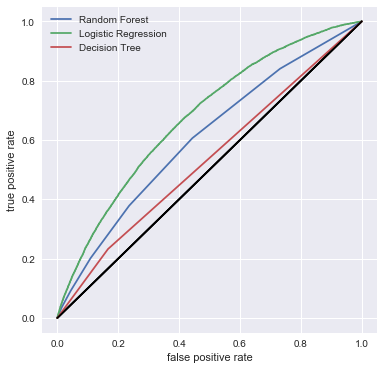

In [36]:
model_report,cm_dict = train_eval_model(different_model_comparison,X_train,y_train,X_test,y_test)

In [37]:
cm_dict

{'Decision Tree': Predicted      0      1
 True                   
 0          59975  11981
 1          10528   3188, 'Logistic Regression': Predicted      0   1
 True                
 0          71940  16
 1          13693  23, 'Random Forest': Predicted      0     1
 True                  
 0          70902  1054
 1          13220   496}

### Run models using balanced Data

Need to install this package, paste into conda Prompt  
`conda install -c glemaitre imbalanced-learn`

We balance the classes using the SMOTE ( Synthetic Minority Over-sampling Technique).  
**The minority class is oversampled by SMOTE** 

http://contrib.scikit-learn.org/imbalanced-learn/stable/generated/imblearn.over_sampling.SMOTE.html  
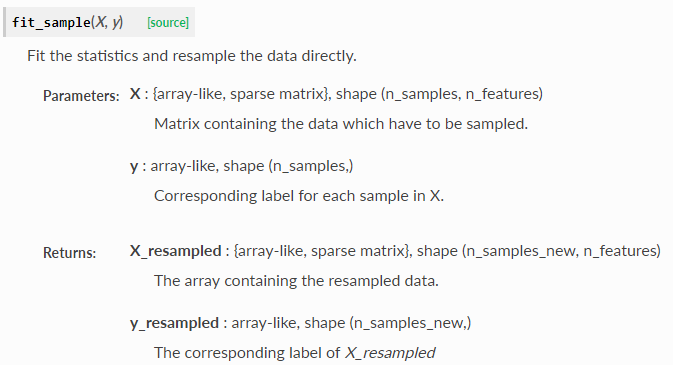



In [38]:
from imblearn.over_sampling import SMOTE
index_split = int(len(X)*0.7) #30% testing

X_train_bal, y_train_bal = SMOTE(random_state=0).fit_sample(X_train,y_train)
X_test_bal, y_test_bal = X_test, y_test

# X_train_bal, y_train_bal = SMOTE(random_state=0).fit_sample(X_train[0:index_split, :], y[0:index_split])
# X_test_bal, y_test_bal = X_train[index_split:], y[index_split:]

In [39]:
len(X_train_bal)

336734

In [40]:
len(X_train)

199899

In [41]:
sum(y_train_bal)/len(y_train_bal)

0.5

Before balancing the data, only 15% are bad loan. Which will harm the performance of the model  
After balancing the data using SMOTE, 50% are bad loan. 

In [42]:
sum(y_train)/len(y_train)

0.15773965852755642

In [43]:
sum(y_train_bal)/len(y_train_bal)

0.5

Training: Random Forest
Training: Logistic Regression
Training: Decision Tree
Evaluating: Random Forest
Evaluating: Logistic Regression
Evaluating: Decision Tree


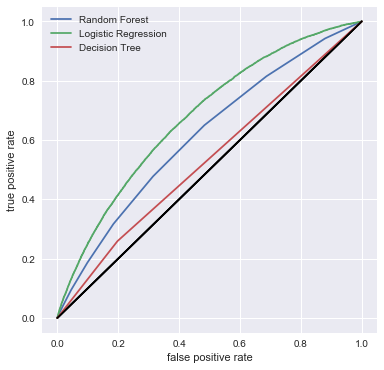

In [44]:
model_report_bal,cm_dict_bal = train_eval_model(different_model_comparison,X_train_bal,y_train_bal,X_test_bal,y_test_bal)

In [45]:
cm_dict_bal

{'Decision Tree': Predicted      0      1
 True                   
 0          57748  14208
 1          10165   3551, 'Logistic Regression': Predicted      0      1
 True                   
 0          43863  28093
 1           4847   8869, 'Random Forest': Predicted      0     1
 True                  
 0          64855  7101
 1          11160  2556}

Training: Random Forest(1)
Training: Random Forest(5)
Training: Random Forest(10)
Training: Random Forest(15)
Training: Random Forest(20)
Training: Random Forest(25)
Training: Random Forest(30)
Evaluating: Random Forest(1)
Evaluating: Random Forest(5)
Evaluating: Random Forest(10)
Evaluating: Random Forest(15)
Evaluating: Random Forest(20)
Evaluating: Random Forest(25)
Evaluating: Random Forest(30)


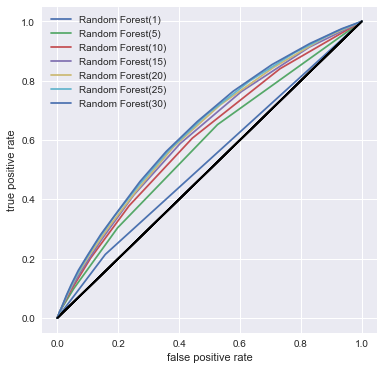

In [46]:
model_report_n_trees,cm_dict_n_trees = train_eval_model(different_tree_number_comaprison,X_train,y_train,X_test,y_test)

Training: Random Forest(1)
Training: Random Forest(5)
Training: Random Forest(10)
Training: Random Forest(15)
Training: Random Forest(20)
Training: Random Forest(25)
Training: Random Forest(30)
Evaluating: Random Forest(1)
Evaluating: Random Forest(5)
Evaluating: Random Forest(10)
Evaluating: Random Forest(15)
Evaluating: Random Forest(20)
Evaluating: Random Forest(25)
Evaluating: Random Forest(30)


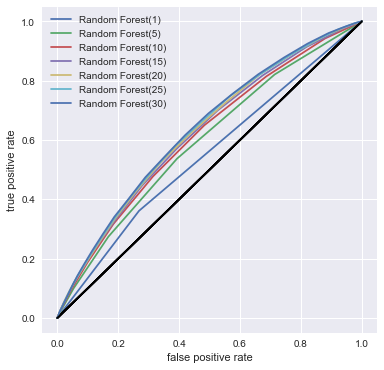

In [47]:
model_report_n_trees_bal,cm_dict_n_trees_bal = train_eval_model(different_tree_number_comaprison,X_train_bal,y_train_bal,X_test_bal,y_test_bal)

## Compare the performance

### Find the best parameter for Random Forest

**Random Forest with different tree numbers**

In [48]:
model_report_n_trees

,model,roc_auc_score,precision,recall,f1
0,Random Forest(1),0.528303,0.205771,0.214202,0.209902
1,Random Forest(5),0.580098,0.258442,0.099883,0.144082
2,Random Forest(10),0.606063,0.320000,0.036162,0.064981
3,Random Forest(15),0.620836,0.314815,0.040901,0.072396
4,Random Forest(20),0.628378,0.319043,0.023330,0.043481
5,Random Forest(25),0.634525,0.330164,0.027851,0.051368
6,Random Forest(30),0.638832,0.364247,0.019758,0.037483


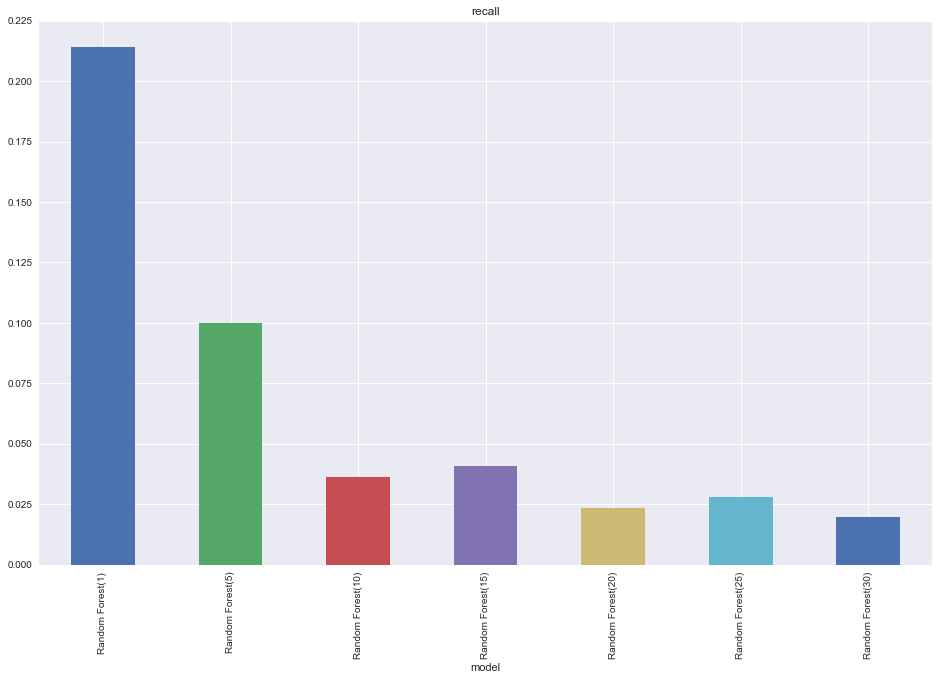

In [49]:
plot_which_bar(model_report_n_trees,"recall")

In [50]:
model_report_n_trees_bal

,model,roc_auc_score,precision,recall,f1
0,Random Forest(1),0.546420,0.204179,0.361184,0.260881
1,Random Forest(5),0.593825,0.237485,0.274278,0.254559
2,Random Forest(10),0.613564,0.264678,0.186352,0.218714
3,Random Forest(15),0.622800,0.265581,0.227107,0.244842
4,Random Forest(20),0.628204,0.274133,0.179717,0.217104
5,Random Forest(25),0.631632,0.272336,0.207568,0.235581
6,Random Forest(30),0.634935,0.282168,0.181467,0.220881


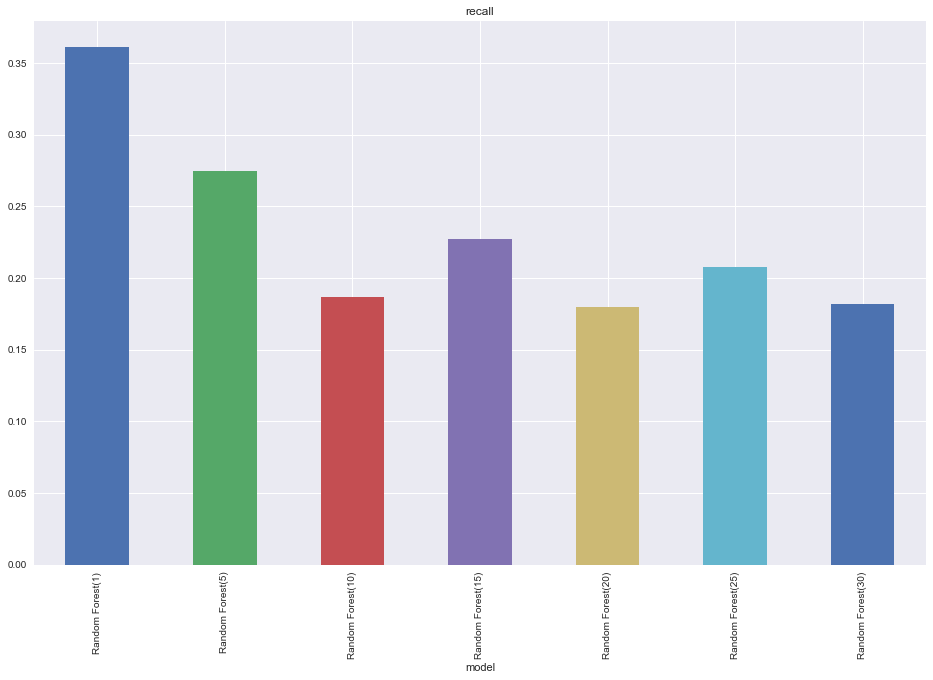

In [51]:
plot_which_bar(model_report_n_trees_bal,"recall")

### Compare Model sets using balanced / unbalanced data

**Unbalanced Data**

In [52]:
model_report

,model,roc_auc_score,precision,recall,f1
0,Random Forest,0.606063,0.320000,0.036162,0.064981
1,Logistic Regression,0.677632,0.589744,0.001677,0.003344
2,Decision Tree,0.532962,0.210165,0.232429,0.220737


**Balanced Data**

In [53]:
model_report_bal

,model,roc_auc_score,precision,recall,f1
0,Random Forest,0.613564,0.264678,0.186352,0.218714
1,Logistic Regression,0.677789,0.239949,0.646617,0.350014
2,Decision Tree,0.530720,0.199955,0.258895,0.225639


## Conclusion 

This project focused on building different machine learning models and evaluating the performance of random forest, decision tree and logistic regression with unbalanced train data and balanced train data. We found that after oversampling the minority class by Synthetic Minority Over-Sampling Technique (SMOTE) in the training set, the recall score improves for every model, especially logistic regression. The recall score indicates that the logistic regression can classify 65% of the applicants that will default. However, we can’t find a random forest model that works better than logistic regression.  
Perlich, Provost, Simonoff (2003) state that logistic regression is likely to perform best when the signal to noise ratio is low, which in technical terms means that if the AUC of the best model is below 0.8, logistic very clearly outperformed tree induction.  We think the complexity of our data, in other words low signal to noise ratio can be the reason why logistic regression performs best.   
Besides the high recall score after using balanced data, logistic regression also has other benefits such as easy to interpret by viewing the parameters, that’s the reason we would recommend the financial institutions to use logistic regression to perform default prediction. 
